In [3]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error
import numpy as np


In [4]:
import pandas as pd

url='https://drive.google.com/file/d/1-4YpXkd2kIOM5viSRw8g7oOQm8sicciB/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
y_train = pd.read_csv(url, index_col=0)

url='https://drive.google.com/file/d/1-7VK3dNry2-AYnfRsxMWsOKhHHMTN_ZA/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_indices = pd.read_csv(url, index_col=0)

In [5]:
# f = lambda x: x.split("_")
# y_train[:, ""]
# list(map(f, y_train.columns))

url='https://drive.google.com/file/d/1-07zZ5oLAJZDck0WLMGVONV62jgTtxzZ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
unprocessed_data_train = pd.read_csv(url, index_col=0)


In [6]:
unprocessed_data_train.shape

(344977, 6)

In [7]:
unprocessed_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344977 entries, 0 to 344976
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              344977 non-null  object 
 1   location          233722 non-null  object 
 2   food              43749 non-null   object 
 3   quantity(kg)      344977 non-null  float64
 4   very_simple_food  43749 non-null   object 
 5   district          344977 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.4+ MB


In [8]:
unprocessed_data_train.isna().sum()

date                     0
location            111255
food                301228
quantity(kg)             0
very_simple_food    301228
district                 0
dtype: int64

In [9]:
df = unprocessed_data_train.dropna()

In [10]:
df

,date,location,food,quantity(kg),very_simple_food,district
1,2010-01-03,קיבוץ יפעת,ברוקולי,5000.0,other,other
2,2010-01-03,קיבוץ הזורע,אשכוליות,1200.0,אשכוליות,מחוז הצפון
3,2010-01-03,קיבוץ קבוצת שילר,קלמנטינות,4300.0,קלמנטינות,other
4,2010-01-04,צופית,פלפל חריף,800.0,other,מחוז המרכז
5,2010-01-04,מעלה גמלא,פומלית,7000.0,פומלית,מחוז הצפון
...,...,...,...,...,...,...
344917,2020-01-12,אשקלון,קלמנטינות )ד(,2280.0,קלמנטינות,מחוז הדרום
344919,2020-01-12,קיבוץ יזרעאל,לפת )ד(,1230.0,לפת,מחוז הצפון
344920,2020-01-12,קיבוץ יזרעאל,סלק )ד(,3420.0,סלק,מחוז הצפון
344921,2020-01-12,קיבוץ יזרעאל,צנון )ד(,7200.0,צנון,מחוז הצפון


In [11]:
df[(df["district"] == "מחוז הדרום") &
    (df["date"] <= "2010-01-10")]

,date,location,food,quantity(kg),very_simple_food,district
12,2010-01-05,ערוגות,אשכוליות,4800.0,אשכוליות,מחוז הדרום
13,2010-01-06,ינון,חצילים,6600.0,חצילים,מחוז הדרום
24,2010-01-07,ערוגות,כרובית,3500.0,other,מחוז הדרום
25,2010-01-10,שדה עוזיהו,חצילים,6300.0,חצילים,מחוז הדרום


In [12]:
df["date_ts"] = df[["date"]].apply(lambda x: dt.strptime(x[0], "%Y-%m-%d").timestamp(), axis=1).astype(int)

/tmp/ipykernel_11273/1188387215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_ts"] = df[["date"]].apply(lambda x: dt.strptime(x[0], "%Y-%m-%d").timestamp(), axis=1).astype(int)


In [17]:
df

,date,location,food,quantity(kg),very_simple_food,district,date_ts
1,2010-01-03,קיבוץ יפעת,ברוקולי,5000.0,other,other,1262469600
2,2010-01-03,קיבוץ הזורע,אשכוליות,1200.0,אשכוליות,מחוז הצפון,1262469600
3,2010-01-03,קיבוץ קבוצת שילר,קלמנטינות,4300.0,קלמנטינות,other,1262469600
4,2010-01-04,צופית,פלפל חריף,800.0,other,מחוז המרכז,1262556000
5,2010-01-04,מעלה גמלא,פומלית,7000.0,פומלית,מחוז הצפון,1262556000
...,...,...,...,...,...,...,...
344917,2020-01-12,אשקלון,קלמנטינות )ד(,2280.0,קלמנטינות,מחוז הדרום,1578780000
344919,2020-01-12,קיבוץ יזרעאל,לפת )ד(,1230.0,לפת,מחוז הצפון,1578780000
344920,2020-01-12,קיבוץ יזרעאל,סלק )ד(,3420.0,סלק,מחוז הצפון,1578780000
344921,2020-01-12,קיבוץ יזרעאל,צנון )ד(,7200.0,צנון,מחוז הצפון,1578780000


In [13]:

X = pd.concat([df[["date_ts"]], pd.get_dummies(df[["location"]]), pd.get_dummies(df[["food"]])], axis=1).to_numpy()
Y = df["quantity(kg)"].to_numpy()


model = dtr(random_state=0)

model.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [14]:
Y_pred = model.predict(X)
mean_squared_error(Y, Y_pred, squared=False)

957.3962459708139

In [31]:
train = y_train.reset_index()
melted_train = pd.melt(train, id_vars=["year_weeks"], var_name="City", value_name="Weight")
melted_train["temp"] = melted_train[["City"]].apply(lambda x: x[0].split("_"), axis=1)
melted_train[["food", "district"]] = pd.DataFrame(melted_train["temp"].tolist())
melted_train["date_ts"] = list(map(lambda x: dt.strptime(x.split("/")[0], "%Y-%m-%d").timestamp(), melted_train.year_weeks))
melted_train = melted_train[["year_weeks", "date_ts", "food", "district", "Weight"]]

X = pd.concat([melted_train[["date_ts"]], pd.get_dummies(melted_train[["district"]]), pd.get_dummies(melted_train[["food"]])], axis=1).to_numpy()
Y = melted_train["Weight"].to_numpy()

model = dtr(random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
Y_pred = model.predict(X_test)
mean_squared_error(Y_test, Y_pred, squared=False)

7950.209294439539

In [20]:
test_indices.reset_index(inplace=True)
if "index" in test_indices.columns:
    test_indices.drop(columns=["index"], inplace=True)
test_indices["date_ts"] = list(map(lambda x: dt.strptime(x.split("/")[0], "%Y-%m-%d").timestamp(), test_indices.year_weeks))


In [22]:
foodDistrict = melted_train[["food", "district"]].drop_duplicates()
foodDistrict.reset_index(inplace=True)
foodDistrict.drop(columns="index", inplace=True)

In [27]:
X_cross = test_indices.merge(foodDistrict, how="cross")
X_test_df = pd.concat([X_cross["date_ts"],
                       pd.get_dummies(X_cross["food"]),
                       pd.get_dummies(X_cross["district"])], axis=1)
X_test = X_test_df.to_numpy()
print(X_test)

[[1.5788664e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.5788664e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.5788664e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.6574868e+09 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.6574868e+09 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.6574868e+09 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


In [28]:
Y_pred = model.predict(X_test)
X_cross["Weight"] = Y_pred


In [29]:
def revert(df):
    df = pd.concat([df["year_weeks"], df[["food", "district"]].apply(lambda x: f"{x[0]}_{x[1]}", axis=1).rename("placeXfood"), df["Weight"]], axis=1)
    print("concat")
    df = df.set_index(["year_weeks", "placeXfood"])["Weight"].unstack()
    print("stacked")
    df.columns.name = None
    return df
finaldf = revert(X_cross[["year_weeks", "food", "district", "Weight"]])

concat
stacked


In [30]:
finaldf.to_csv("AnswersFromMain.csv")


In [210]:
train = y_train.reset_index()
melted_train = pd.melt(train, id_vars=["year_weeks"], var_name="City", value_name="Weight")
melted_train["temp"] = melted_train[["City"]].apply(lambda x: x[0].split("_"), axis=1)
melted_train[["food", "district"]] = pd.DataFrame(melted_train["temp"].tolist())
melted_train["month"] = list(map(lambda x: int(x.split("/")[1].split("-")[1]), melted_train.year_weeks))
melted_train = melted_train[["year_weeks", "month", "food", "district", "Weight"]]

X_train_df = pd.concat([pd.get_dummies(melted_train["month"]),
                     pd.get_dummies(melted_train["food"]),
                     pd.get_dummies(melted_train["district"])], axis=1)

X_train = X_train_df.to_numpy()
Y_train = melted_train["Weight"].to_numpy()
# print(X_train.to_numpy())
# pd.get_dummies(melted_train[["month", "food"]])


In [212]:
model = dtr(random_state=0)

model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [217]:
melted_train

,year_weeks,month,food,district,Weight
0,2009-12-28/2010-01-03,1,other,יהודה ושומרון,0.0
1,2010-01-04/2010-01-10,1,other,יהודה ושומרון,0.0
2,2010-01-11/2010-01-17,1,other,יהודה ושומרון,0.0
3,2010-01-18/2010-01-24,1,other,יהודה ושומרון,0.0
4,2010-01-25/2010-01-31,1,other,יהודה ושומרון,0.0
...,...,...,...,...,...
99031,2019-12-09/2019-12-15,12,month,None,12.0
99032,2019-12-16/2019-12-22,12,month,None,12.0
99033,2019-12-23/2019-12-29,12,month,None,12.0
99034,2019-12-30/2020-01-05,1,month,None,1.0


In [258]:
# revert into old format


# merge food and district into old format
df = pd.concat([melted_train["year_weeks"], melted_train[["food", "district"]].apply(lambda x: f"{x[0]}_{x[1]}", axis=1).rename("placeXfood"), melted_train["Weight"]], axis=1)
df = df.set_index(["year_weeks", "placeXfood"])["Weight"].unstack()
df.columns.name = None
df


,other_יהודה ושומרון,other_מחוז הדרום,other_מחוז המרכז,other_מחוז הצפון,other_מחוז חיפה,other_מחוז ירושלים,other_מחוז תל אביב,אבטיחים_other,אבטיחים_יהודה ושומרון,אבטיחים_מחוז הדרום,...,תפוזים_מחוז המרכז,תפוזים_מחוז הצפון,תפוזים_מחוז חיפה,תפוזים_מחוז תל אביב,תפוחים_other,תפוחים_מחוז הדרום,תפוחים_מחוז המרכז,תפוחים_מחוז הצפון,תפוחים_מחוז חיפה,תפוחים_מחוז תל אביב
year_weeks,,,,,,,,,,,,,,,,,,,,,
2009-12-28/2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-04/2010-01-10,0.0,3500.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-11/2010-01-17,0.0,0.0,780.0,4700.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-18/2010-01-24,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-25/2010-01-31,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09/2019-12-15,0.0,502.0,19624.5,0.0,450.0,0.0,0.0,0.0,0.0,0.0,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-16/2019-12-22,0.0,2315.0,11764.0,2470.0,0.0,0.0,400.0,0.0,0.0,0.0,...,0.0,0.0,5070.0,2730.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-23/2019-12-29,0.0,12885.0,4830.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4485.0,2340.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
y_train.index

Index(['2009-12-28/2010-01-03', '2010-01-04/2010-01-10',
       '2010-01-11/2010-01-17', '2010-01-18/2010-01-24',
       '2010-01-25/2010-01-31', '2010-02-01/2010-02-07',
       '2010-02-08/2010-02-14', '2010-02-15/2010-02-21',
       '2010-02-22/2010-02-28', '2010-03-01/2010-03-07',
       ...
       '2019-11-04/2019-11-10', '2019-11-11/2019-11-17',
       '2019-11-18/2019-11-24', '2019-11-25/2019-12-01',
       '2019-12-02/2019-12-08', '2019-12-09/2019-12-15',
       '2019-12-16/2019-12-22', '2019-12-23/2019-12-29',
       '2019-12-30/2020-01-05', '2020-01-06/2020-01-12'],
      dtype='object', name='year_weeks', length=524)

In [189]:
y_train["month"] = list(map(lambda x: int(x.split("/")[1].split("-")[1]), y_train.index))

In [192]:
# y_train.set_index([y_train.index, "month"])
pd.get_dummies(y_train["month"])

,1,2,3,4,5,6,7,8,9,10,11,12
year_weeks,,,,,,,,,,,,
2009-12-28/2010-01-03,1,0,0,0,0,0,0,0,0,0,0,0
2010-01-04/2010-01-10,1,0,0,0,0,0,0,0,0,0,0,0
2010-01-11/2010-01-17,1,0,0,0,0,0,0,0,0,0,0,0
2010-01-18/2010-01-24,1,0,0,0,0,0,0,0,0,0,0,0
2010-01-25/2010-01-31,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09/2019-12-15,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-16/2019-12-22,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-23/2019-12-29,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
test_indices

,year_weeks,date_ts
0,2020-01-13/2020-01-19,1.578866e+09
1,2020-01-20/2020-01-26,1.579471e+09
2,2020-01-27/2020-02-02,1.580076e+09
3,2020-02-03/2020-02-09,1.580681e+09
4,2020-02-10/2020-02-16,1.581286e+09
...,...,...
126,2022-06-13/2022-06-19,1.655068e+09
127,2022-06-20/2022-06-26,1.655672e+09
128,2022-06-27/2022-07-03,1.656277e+09
129,2022-07-04/2022-07-10,1.656882e+09


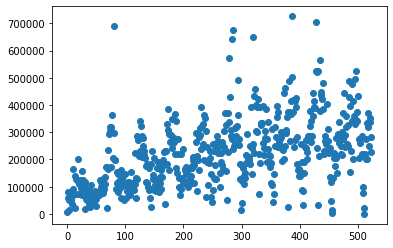

In [170]:
temp = pd.DataFrame(y_train.transpose().sum().rename("Sum"))
temp["Time"] = np.arange(len(temp.index))
# temp
plt.scatter(temp["Time"], temp["Sum"])

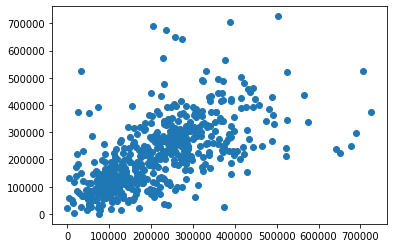

In [175]:
temp["lag_1"] = temp["Sum"].shift(1)
plt.scatter(temp["lag_1"], temp["Sum"])